<a href="https://colab.research.google.com/github/luthfijuliandri/Proyek-Dicoding-Analisis-Data-dengan-Python/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Rental
- **Nama:** Muhammad Luthfi Juliandri
- **Email:** mluthfijuliandri@gmail.com
- **ID Dicoding:** luthfijuliandri

## Menentukan Pertanyaan Bisnis

1.   Bagaimana perbandingan tren jumlah penyewaan sepeda berdasarkan bulan pada tahun 2011 dan tahun 2012?
2. Bagaimana perbandingan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?
3. Apakah musim berpengaruh terhadap jumlah penyewaan sepeda?
4. Bagaimana distribusi jumlah penyewaan sepeda berdasarkan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [98]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

## Data Wrangling

In [99]:
!git clone https://github.com/luthfijuliandri/Proyek-Dicoding-Analisis-Data-dengan-Python

fatal: destination path 'Proyek-Dicoding-Analisis-Data-dengan-Python' already exists and is not an empty directory.


### Gathering Data

In [100]:
df_day = pd.read_csv("/content/Proyek-Dicoding-Analisis-Data-dengan-Python/dataset/day.csv")
df_hour = pd.read_csv("/content/Proyek-Dicoding-Analisis-Data-dengan-Python/dataset/hour.csv")

In [101]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [102]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Mencari Missing Value**

day.csv

In [103]:
print("Missing Value in day.csv:")
print(df_day.isna().sum())

Missing Value in day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


hour.csv

In [104]:
print("Missing Value in hour.csv:")
print(df_day.isna().sum())

Missing Value in hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Tidak ada missing value terhadap day.csv dan hour.csv

**Mencarikan Duplicate Data**

day.csv

In [105]:
print("Duplicate in day.csv:")
print(df_day.duplicated().sum())

Duplicate in day.csv:
0


hour.csv

In [106]:
print("Duplicate in hour.csv:")
print(df_hour.duplicated().sum())

Duplicate in hour.csv:
0


Tidak ada duplicate data terhadap day.csv dan hour.csv

**Tipe Data**

day.csv

In [107]:
print("Tipe data day.csv:")
print(df_day.info())

Tipe data day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


hour.csv

In [108]:
print("Tipe data hour.csv:")
print(df_hour.info())

Tipe data hour.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Tipe data pada dteday harusnya berupa tipe data datetime sehingga harus dilakukan data cleansing



### Cleaning Data

**Mengubah tipe data pada dteday**

In [109]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

Cek tipe data terbaru yang sudah diubah

In [110]:
print("day.csv:")
print(df_day["dteday"].dtypes)

print("hour.csv:")
print(df_hour["dteday"].dtypes)

day.csv:
datetime64[ns]
hour.csv:
datetime64[ns]


Data sudah berubah

**Merubah deskripsi data mnth, weekday, season dan weathesit day dari angka menjadi categorical sehingga lebih mudah dibaca pada visualisasi data**

In [111]:
#mnth
df_day['mnth'] = df_day.mnth.astype('category')
df_day['mnth'] = df_day['mnth'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

#Weekday
df_day['weekday'] = df_day.weekday.astype('category')
df_day['weekday'] = df_day['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

#Season
df_day['season'] = df_day.season.astype('category')
df_day['season'] = df_day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

#weathersit
df_day['weathersit'] = df_day.weathersit.astype('category')
df_day['weathersit'] = df_day['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [112]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,January,0,Saturday,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,January,0,Sunday,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,January,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,January,0,Tuesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,January,0,Wednesday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [113]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(4), datetime64

### Explore ...

## Exploratory Data Analysis (EDA)

**Mengelompokkan pesepeda berdasarkan bulan (mnth)**

In [114]:
df_day.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
            max   min         mean     sum
mnth                                      
January    4521   431  2176.338710  134933
February   5062  1005  2655.298246  151352
March      8362   605  3692.258065  228920
April      7460   795  4484.900000  269094
May        8294  2633  5349.774194  331686
June       8120  3767  5772.366667  346342
July       8173  3285  5563.677419  344948
August     7865  1115  5664.419355  351194
September  8714  1842  5766.516667  345991
October    8156    22  5199.225806  322352
November   6852  1495  4247.183333  254831
December   6606   441  3403.806452  211036

**Mengelompokkan Pesepeda berdasarkan hari kerja (workingday):**

In [115]:
df_day.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

**Mengelompokkan Pesepeda berdasarkan hari libur (holiday)**

In [116]:
df_day.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

**Mengelompokkan pesepeda berdasarkan musim (season)**

In [117]:
df_day.groupby(by='season').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
         max   min         mean      sum
season                                  
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Fall    8714  1115  5644.303191  1061129
Winter  8555    22  4728.162921   841613

**Mengelompokkan pesepeda berdasarkan kondisi cuaca (weathersit)**

In [118]:
df_day.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Misty/Cloudy         8362  605  4035.862348   996858
Light Snow/Rain      4639   22  1803.285714    37869

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan tren jumlah penyewaan sepeda berdasarkan bulan pada tahun 2011 dan tahun 2012?

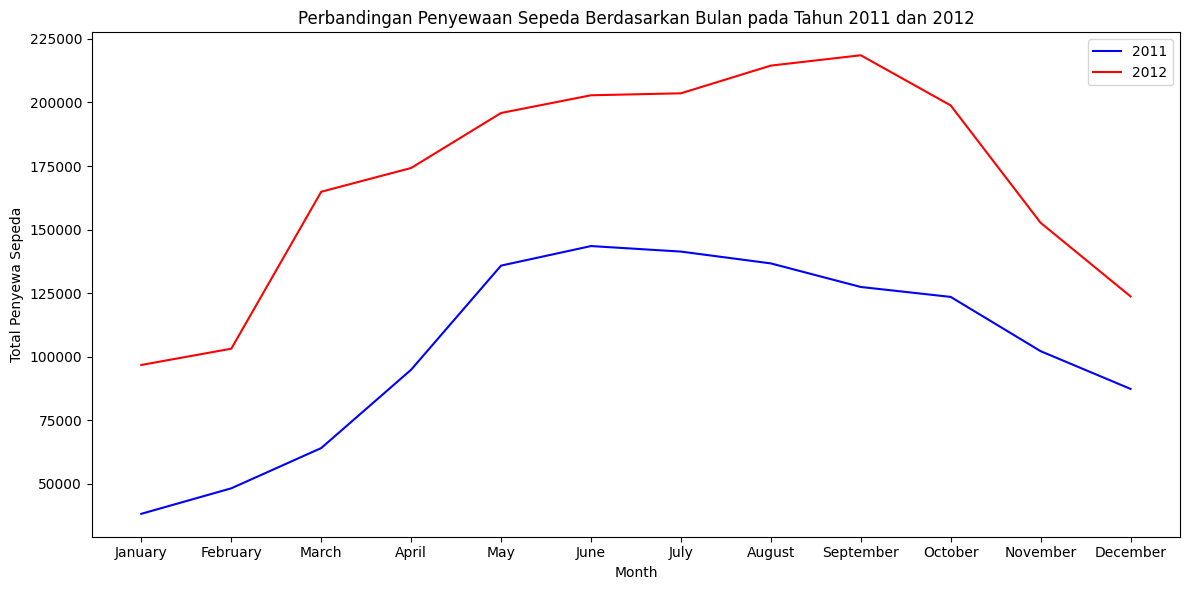

In [119]:
# mendefinisikan tahun
yr_2011 = df_day[df_day['yr'] == 0]
yr_2012 = df_day[df_day['yr'] == 1]

# mengelompokkan total pesepeda berdasarkan bulan
mnth_2011 = yr_2011.groupby('mnth')['cnt'].sum()
mnth_2012 = yr_2012.groupby('mnth')['cnt'].sum()

# adjust ukuran figure
plt.figure(figsize=(12, 6))

# plotting data 2011
plt.plot(mnth_2011.index, mnth_2011, label='2011', color='blue')

# Plotting data 2012
plt.plot(mnth_2012.index, mnth_2012, label='2012', color='red')

plt.title('Perbandingan Penyewaan Sepeda Berdasarkan Bulan pada Tahun 2011 dan 2012')
plt.xlabel('Month')
plt.ylabel('Total Penyewa Sepeda')
plt.legend()
plt.tight_layout()
plt.show()

Figure menunjukkan tahun 2012 memiliki penyewa sepeda yang lebih banyak dibandingkan tahun 2011. Kedua figure juga memperlihatkan bahwa peningkatan penyewa sepeda terjadi di pertengahan tahun dan mulai mengalami penurunan pada akhir tahun.

### Pertanyaan 2: Bagaimana perbandingan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

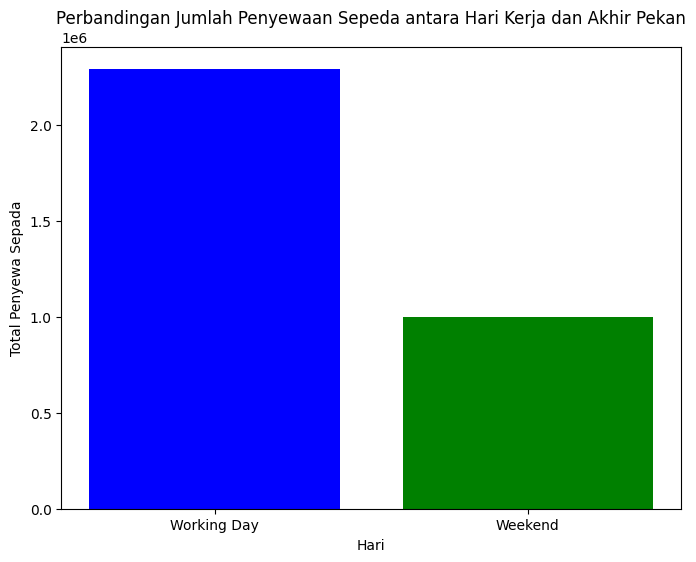

In [120]:
# mengelompokkan total penyewa sepeda pada workingday dan weekend
cnt_workingday = df_day[df_day['workingday'] == 1]['cnt'].sum()
cnt_weekend = df_day[df_day['workingday'] == 0]['cnt'].sum()

# adjust ukuran figure
plt.figure(figsize=(8, 6))

# plotting
plt.bar(['Working Day', 'Weekend'], [cnt_workingday, cnt_weekend], color=['blue', 'green'])

plt.title('Perbandingan Jumlah Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan')
plt.ylabel('Total Penyewa Sepada')
plt.xlabel('Hari')
plt.show()


Perbandingan menunjukkan

### Pertanyaan 3: Apakah musim berpengaruh terhadap jumlah penyewaan sepeda?

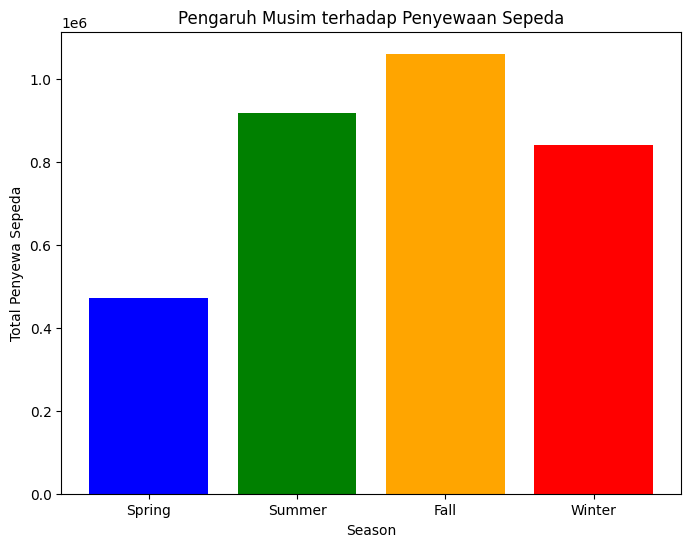

In [121]:


# mengelompokkan jumlah penyewa sepeda berdasarkan musim
cnt_season = df_day.groupby('season')['cnt'].sum()

# adjust ukuran figure
plt.figure(figsize=(8, 6))

# Plotting
plt.bar(cnt_season.index, cnt_season, color=['blue', 'green', 'orange', 'red'])

plt.title('Pengaruh Musim terhadap Penyewaan Sepeda')
plt.ylabel('Total Penyewa Sepeda')
plt.xlabel('Season')
plt.show()


### Pertanyaan 4: Bagaimana distribusi jumlah penyewaan sepeda berdasarkan hari dalam seminggu?

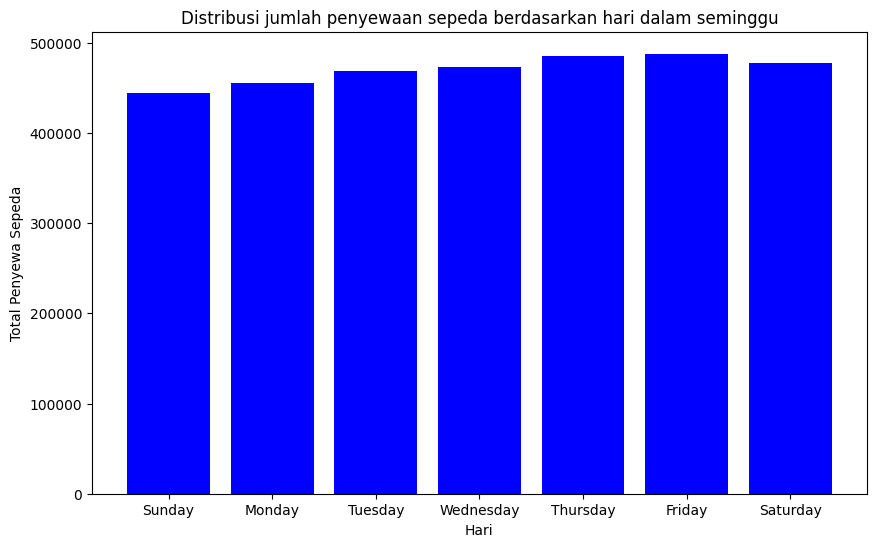

In [122]:
# mengelompokkan total penyewa sepeda berdasarkan hari kerja dan akhir pekan
cnt_weekday = df_day.groupby('weekday')['cnt'].sum()

# Adjust ukuran figure
plt.figure(figsize=(10, 6))

# plotting
plt.bar(cnt_weekday.index, cnt_weekday, color='blue')

plt.title('Distribusi jumlah penyewaan sepeda berdasarkan hari dalam seminggu')
plt.ylabel('Total Penyewa Sepeda')
plt.xlabel('Hari')
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2